<span style="color:#78AE7E">
Aline's comments are in green. :)
<span>

<span style="color:#78AE7E">



<span>

# Discretization of a function of a single variable. Differentiation through finite differences.

## 1 – Code to represent the function and the analytical and numerical derivative.

Consider the function

$$h(x) = \cos\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right],\tag{1}$$

with $x \in (-4,10) $.

Let us define a sampling of $h$ with 64 intervals, that is, 65 points, and store the
values into double precision arrays called $xx$ and $hh$. Numpy arrays are double precision as 
default. To define $xx$ in Python you can use the commands:

`import numpy as np
nump=65
x0=-4.0 
xf=10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0`

Use `matplotlib.pyplot` to visualize hh vs xx. 

Define the variable $nint$ as the number of intervals ($nint= 64$ in the present case)
and $nump$ as the number of points. In IDL, Python and C, those components go
from the $0-$component through the component $nump−1$. Compute the ratio (1) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization) using and filling the function `deriv_dnw` in `nm_lib`. Feel free to use any known library or create your own functions from scratch. 

It will depend on how you created the function that you have $nump$ or $nump−1$ elements. If the former, the last component ($nump-1$) is ill calculated. $hp$ contains a second-order approximation to the derivative of the $hh$ function at the intermediate points $x_{i+1/2}$.

## Tasks:

1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('default')

nump = 65
x0 = -4.0
xf = 10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

nint = 64

def h(x):
    """Single variable function. 
    
    Requires
    --------
    numpy as np
    
    Parameters
    ----------
    x : float or numpy array
    
    Returns
    -------
    float or numpy array
    """
    return np.cos( (np.pi * (x - 1) ) / 2 ) * np.exp( - ( (x - 3) / 2.5)**2 )
    

<span style="color:green">JMS</span>.

<span style="color:blue">GREAT. I like that you updated the requirements acordingly. You can also do that in nm_lib setup.cfg which will then automatically install with pip all the required libs.</span>.

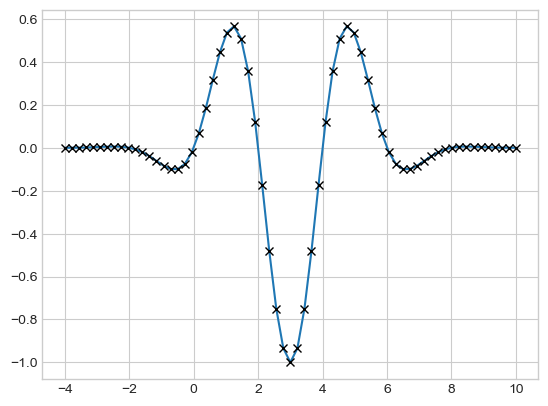

In [2]:
fig, ax = plt.subplots()
ax.plot(xx, h(xx))
ax.plot(xx, h(xx), 'x', c='k')

<span style="color:#78AE7E">

Here we plot the function `h(x)` as a continous line as well as with crosses at each grid point. The crosses are added to visualize the goodness of the discretization.

<span>

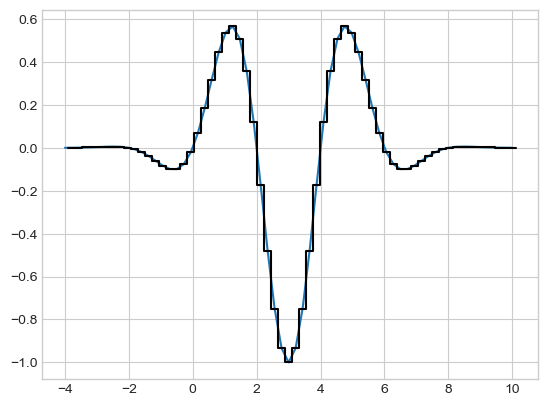

In [3]:
plt.plot(xx, h(xx))

pxl = xx[1] - xx[0]
hist = plt.step((xx+pxl/2), h(xx), c='k')

<span style="color:#78AE7E">

The histogram of the function `h(x)` also shows the goodness of the discretization. Here the gridpoints are shifted by half a pixel to the left.

<span>

2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

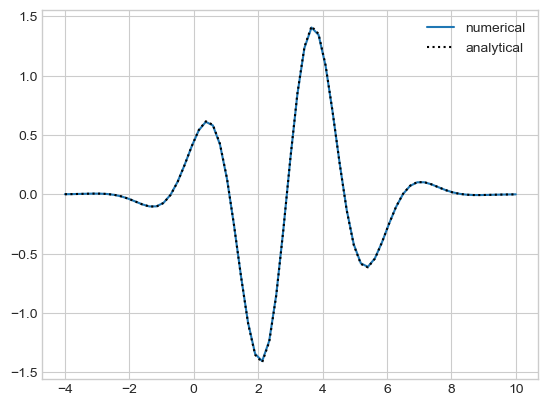

In [4]:
from nm_lib import nm_lib as nm

hp = nm.deriv_dnw(xx, h(xx))
plt.plot(xx, hp, label='numerical')

def analytical(xx):
    return np.exp( -0.16 * (-3 + xx)**2) * (1.5708 * np.cos((np.pi*xx) / 2) - (-0.96 + 0.32 * xx) * np.sin((np.pi * xx) / 2))

an = analytical(xx+pxl/2)
plt.plot(xx, an, label='analytical', ls=':', c='k')

plt.legend()

<span style="color:#78AE7E">

We see here that the numerical solution matches the analytical solution very well. 

<span>

<span style="color:green">JMS</span>.

<span style="color:blue"> good.</span>.


3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

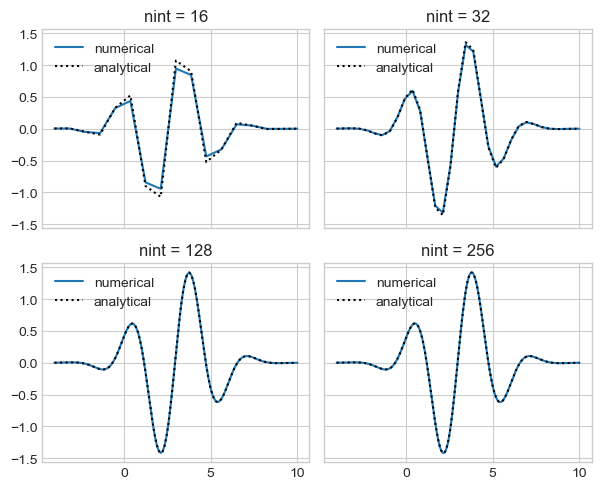

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)

def plot_comparison(ax, nint):
    nump = nint + 1.0
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
    pxl = xx[1] - xx[0]
    hp = nm.deriv_dnw(xx, h(xx))

    ax.plot(xx, hp, label='numerical')
    ax.plot(xx, analytical(xx+pxl/2), label='analytical', ls=':', c='k')
    ax.legend()
    ax.set_title(f'nint = {nint}')


plot_comparison(ax[0, 0], nint=16)
plot_comparison(ax[0, 1], nint=32)
plot_comparison(ax[1, 0], nint=128)
plot_comparison(ax[1, 1], nint=256)

plt.tight_layout()

<span style="color:#78AE7E">

Here we see how the analytical and numerical solutions behave with gridpoints from 16 to 256. The difference between the two solutions clearly decreases as the amount of gridpoints increases.

<span>

<span style="color:green">JMS</span>.

<span style="color:blue">good.</span>.

## 2- Test of the quadratic order of the approximation.

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512 and 1024 intervals (which are successive powers of 2). Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

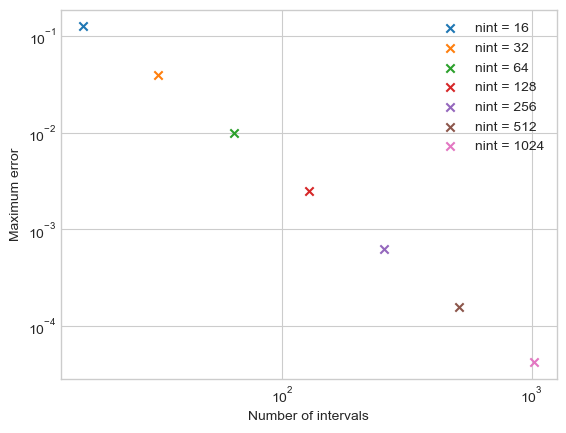

In [6]:
def calculate_error(nint):
    nump = nint + 1.0
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
    pxl = xx[1] - xx[0]
    hp = nm.deriv_dnw(xx, h(xx))[:-1]

    return np.max(np.abs(hp - analytical((xx+pxl/2)[:-1])))


fig, ax = plt.subplots()

for nint in [16, 32, 64, 128, 256, 512, 1024]:
    ax.scatter(nint, calculate_error(nint), label=f'nint = {nint}', marker='x')

ax.set(xscale='log', yscale='log', xlabel='Number of intervals', ylabel='Maximum error')
ax.legend()
plt.show()
plt.close()

<span style="color:#78AE7E">

Here we see that the error decreases as the amount of gridpoints increases. It looks like the errors decrease linearly, and we can do a linear fit to find the slope of this line.

<span>

<span style="color:green">JMS</span>.

<span style="color:blue">Good.</span>.


## 3- Improving the accuracy of the test of the quadratic order of the approximation.

To test the accuracy of the result of the previous paragraph:

1. extend the test to a larger range of number of intervals (including 2048, 4096, 8192, 16384). Make sure to use double precision variables throughout the program (meaning: all variables except the array indices).

2. then try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

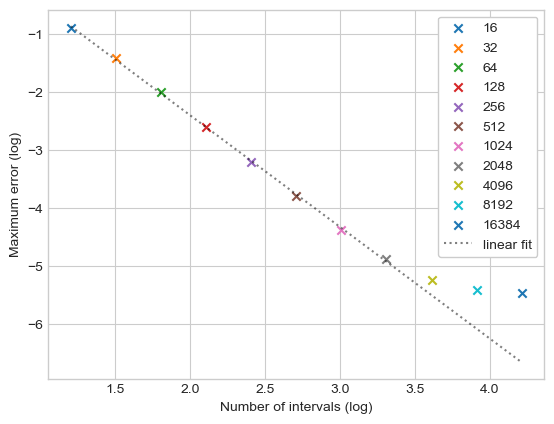

In [7]:
fig, ax = plt.subplots()

errors = []
nints  = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384] 

for i, n in enumerate(nints):
    errors.append(np.double(calculate_error(n)))
    ax.scatter(np.log10(n), np.log10(errors[i]), label=f'{n}', marker='x')

line = np.poly1d(np.polyfit(np.log10(nints[:-3]), np.log10(errors[:-3]), deg=1))
ax.plot(np.log10(nints), line(np.log10(nints)), label='linear fit', ls=':', c='k', alpha=0.5)

ax.set(xlabel='Number of intervals (log)', ylabel='Maximum error (log)')
ax.legend(fancybox=True, framealpha=1, frameon=True)

In [8]:
# Print slope of linear fit
line.coef[0]

-1.928372533213913

<span style="color:#78AE7E">

By fitting a straight line to the errors, we see how perfectly the error decreases as the amount of gridpoints increases.
Here i have excluded the last 3 points from the linear fit, as they do not behave in a perfectly nice, linear way.

We see that the slope of the linear fit is close to -2, meaning that the errors have a quadratic dependence on the amount of gridpoints. This also coincides with the downwind method's order of convergence, which is 2.

<span>

<span style="color:green">JMS</span>.

<span style="color:blue">ok</span>.

## 4- Analytical proof of the order of convergence of the approximation for the derivative (optional)

Consider the sampling used in exercise this, assuming that the spacing between grid points is uniform, i.e., $(\Delta x)_i = \Delta x$. Write a formal Taylor expansion as follows:


$$f(x_{i+1}) = f(x_{i+1/2}) + f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{2}$$

$$f(x_{i}) = f(x_{i+1/2}) - f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{3}$$

including terms up to order $(\Delta x)^3$. Eliminating terms combining those two expressions, conclude that, as said in the previous exercise sheet, the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ carried out there is of 2nd order.

<span style="color:green">JMS</span>.

<span style="color:blue">ok </span>.

<span style="color:#78AE7E">

If we write out the entire Taylor expansion up to order $(\Delta x)^3$, we can insert these into the expression for the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$.

$$
f'(x_{i+1/2}) =  \frac{f(x_{i+1}) - f(x_{i})}{\Delta x} 
$$

After simplifying, we are left with an expression containing a term $\Delta x^2$, which means that the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ is of 2nd order.

</span>

<span style="color:green">JMS</span>.

<span style="color:blue">ok </span>. 